In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [31]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [33]:
Y_train

array([0, 7, 9, ..., 8, 7, 4])

Our NN will have a simple two-layer architecture. Input layer  a[0]
  will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  a[1]
  will have 10 units with ReLU activation, and finally our output layer  a[2]
  will have 10 units corresponding to the ten digit classes with softmax activation.

**Initializing the params**

In [35]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

**Forward Propagation**

Z[1]=W[1]X+b[1]
 
A[1]=gReLU(Z[1]))
 
Z[2]=W[2]A[1]+b[2]
 
A[2]=gsoftmax(Z[2])

In [36]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [37]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

**Backward Propagation**

dZ[2]=A[2]−Y
 
dW[2]=1mdZ[2]A[1]T
 
dB[2]=1mΣdZ[2]
 
dZ[1]=W[2]TdZ[2].∗g[1]′(z[1])
 
dW[1]=1mdZ[1]A[0]T
 
dB[1

**Parameter updates**

W[2]:=W[2]−αdW[2]
 
b[2]:=b[2]−αdb[2]
 
W[1]:=W[1]−αdW[1]
 
b[1]:=b[1]−αdb[1]]=1mΣdZ[1]

In [38]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

**Gradient Descent**

In [39]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [40]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 7 3 ... 7 7 7] [0 7 9 ... 8 7 4]
0.14134146341463413
Iteration:  10
[6 8 3 ... 0 7 6] [0 7 9 ... 8 7 4]
0.20890243902439024
Iteration:  20
[6 8 3 ... 0 7 6] [0 7 9 ... 8 7 4]
0.24721951219512195
Iteration:  30
[6 8 3 ... 0 7 6] [0 7 9 ... 8 7 4]
0.2994390243902439
Iteration:  40
[6 7 3 ... 0 7 0] [0 7 9 ... 8 7 4]
0.3541463414634146
Iteration:  50
[6 9 3 ... 0 7 0] [0 7 9 ... 8 7 4]
0.4119512195121951
Iteration:  60
[6 7 3 ... 0 7 0] [0 7 9 ... 8 7 4]
0.4575365853658537
Iteration:  70
[6 7 9 ... 0 7 0] [0 7 9 ... 8 7 4]
0.5015609756097561
Iteration:  80
[6 7 9 ... 0 7 0] [0 7 9 ... 8 7 4]
0.5392926829268293
Iteration:  90
[6 7 9 ... 8 7 4] [0 7 9 ... 8 7 4]
0.572560975609756
Iteration:  100
[6 7 9 ... 5 7 4] [0 7 9 ... 8 7 4]
0.6023170731707317
Iteration:  110
[6 7 9 ... 5 7 4] [0 7 9 ... 8 7 4]
0.6274878048780488
Iteration:  120
[6 7 9 ... 5 7 4] [0 7 9 ... 8 7 4]
0.6491463414634147
Iteration:  130
[6 7 9 ... 5 7 4] [0 7 9 ... 8 7 4]
0.668609756097561
Iteration:  140


~85% accuracy on training set.

**Predictions**

In [41]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

couple of examples

Prediction:  [0]
Label:  0


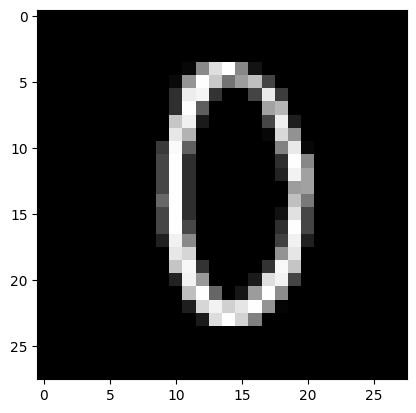

Prediction:  [7]
Label:  7


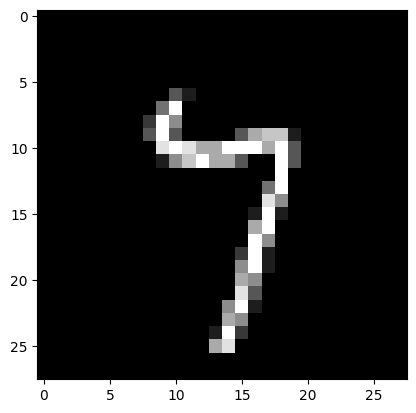

Prediction:  [9]
Label:  9


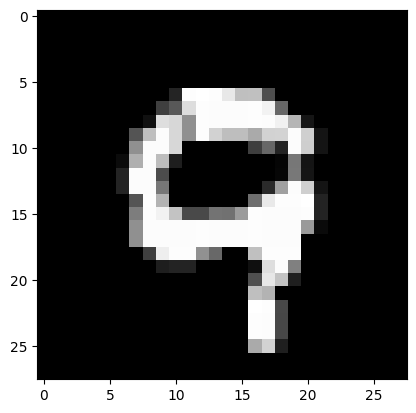

Prediction:  [1]
Label:  1


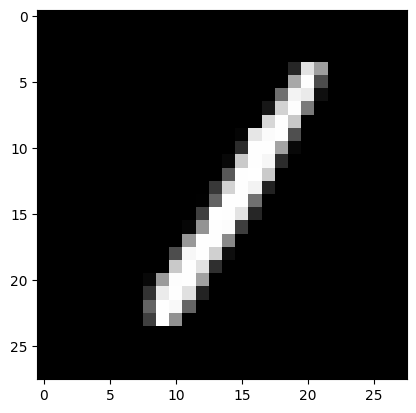

In [42]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [43]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 3 4 1 2 8 0 9 0 1 4 1 7 6 1 6 2 7 0 2 3 6 3 2 2 6 4 5 8 7 9 5 1 7 7 5 5
 9 0 6 3 0 6 7 7 6 9 2 5 4 0 0 0 5 0 7 1 9 9 9 9 6 1 5 3 2 0 7 7 2 5 3 3 0
 3 5 3 2 7 7 4 7 5 8 1 3 1 9 2 3 7 0 3 4 8 2 7 5 8 7 6 9 2 2 9 6 7 6 2 7 9
 9 3 1 2 3 7 2 2 6 4 8 0 7 1 5 8 2 1 5 9 6 5 3 3 6 4 3 0 0 2 9 3 5 0 6 0 6
 7 4 1 8 0 3 2 5 8 4 8 6 2 9 0 7 6 8 4 6 3 7 7 2 8 2 1 0 8 6 0 6 4 6 9 3 3
 5 4 6 0 4 8 8 6 0 8 2 3 5 6 2 0 7 2 5 8 6 9 6 1 1 4 3 4 6 3 1 5 9 9 7 3 9
 4 2 5 4 7 1 7 8 3 6 2 0 2 8 1 0 8 9 7 3 2 9 2 1 8 4 9 2 0 7 3 5 8 1 7 6 8
 3 4 2 2 3 2 0 3 6 3 0 1 2 6 2 0 7 0 4 5 7 5 2 3 9 8 0 7 3 3 3 7 3 1 7 0 8
 4 8 3 8 1 4 8 1 2 0 5 7 3 2 8 4 2 4 1 9 7 7 0 6 4 7 7 2 6 8 4 2 3 2 2 3 8
 2 2 8 0 3 1 8 7 1 4 0 2 1 0 2 4 9 3 6 1 5 6 0 8 6 0 7 7 1 6 1 2 2 0 7 0 2
 9 2 4 6 9 6 8 1 4 3 4 5 3 7 8 6 5 7 3 3 6 3 4 0 4 1 5 4 0 8 5 1 3 9 2 7 1
 9 0 1 4 7 1 0 4 6 6 8 3 7 8 8 5 9 0 8 5 7 3 2 8 9 2 3 9 8 6 2 2 8 1 0 5 8
 6 1 4 1 9 0 1 1 3 6 0 3 0 0 2 2 9 0 3 2 3 1 7 3 9 0 8 1 9 8 7 4 6 7 4 6 0
 9 1 4 1 7 6 2 8 3 7 2 2 

0.839